In [74]:
# K Nearest Neighbor
# Import Data Library
import numpy as np
import pandas as pd

# Import Graph Library
import matplotlib.pyplot as plt
import seaborn as sb

# Import Data Selection Library
import sklearn.model_selection as skm

# Import Machine Learning Library
import sklearn.linear_model as skl
import sklearn.neighbors as skn

# Import Evaluate Library
import sklearn.metrics as skmt

In [7]:
# Set Data
data_df = pd.read_csv('./data/Student_Marks.csv')
data_df.info()
data_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   number_courses  100 non-null    int64  
 1   time_study      100 non-null    float64
 2   Marks           100 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299
...,...,...,...
95,6,3.561,19.128
96,3,0.301,5.609
97,4,7.163,41.444
98,7,0.309,12.027


In [9]:
# Data Analyze Correlation
data_df.corr()

,number_courses,time_study,Marks
number_courses,1.000000,0.204844,0.417335
time_study,0.204844,1.000000,0.942254
Marks,0.417335,0.942254,1.000000


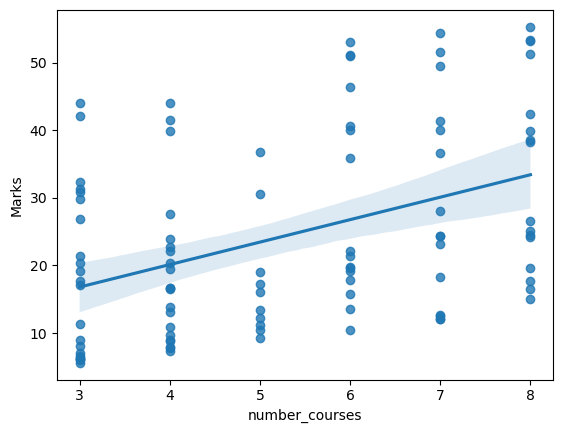

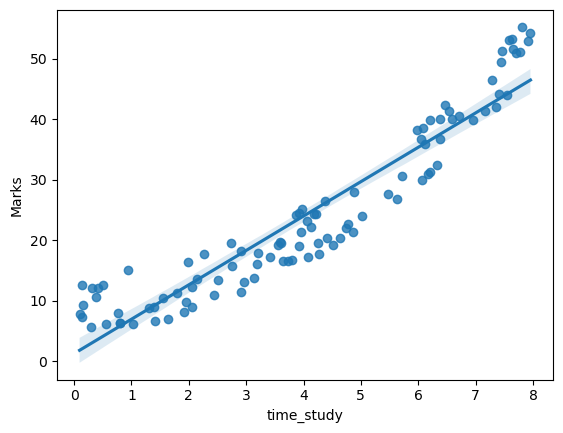

In [29]:
# Data Graph
sb.regplot(x = 'number_courses', y = 'Marks', data = data_df)
plt.show()
sb.regplot(x = 'time_study', y= 'Marks', data = data_df)
plt.show()

In [37]:
# Divide Data by iloc
data_train = data_df.iloc[0:80, 0:2]
data_train_ans = data_df.iloc[0:80, 2]
data_predict = data_df.iloc[80: , 0:2]
data_predict_ans = data_df.iloc[80: , 2]

# Divide Data by train test split
data_x = data_df.iloc[:, :-1]
data_y = data_df['Marks']
data_train, data_predict, data_train_ans, data_predict_ans = skm.train_test_split(data_x, data_y, train_size = 0.8, random_state = 0)


,number_courses,time_study
43,5,1.557
62,6,3.606
3,6,7.909
71,5,2.518
45,3,2.061
...,...,...
96,3,0.301
67,3,0.550
64,7,0.130
47,4,4.779


In [43]:
# K Nearest Neighbor Regression Model
knnr_model = skn.KNeighborsRegressor()
knnr_model = knnr_model.fit(data_train, data_train_ans)
knnr_model

KNeighborsRegressor()

In [45]:
# Predict Data by K Nearest Neighbor Regression
knnr_result = knnr_model.predict(data_predict)
knnr_result

array([12.462 , 24.8144, 14.6756, 18.1174,  6.1638, 41.8852, 32.7114,
        7.2098, 53.181 , 20.1534, 38.8178, 22.6376, 49.0116, 19.5232,
       17.5978, 24.9656, 11.6804, 17.    , 40.2196, 19.5098])

In [47]:
# Predict Data Frame
knnr_result_df = pd.DataFrame({'Predict' : knnr_result, 'Answer' : data_predict_ans, 'Diff' : knnr_result - data_predict_ans})
knnr_result_df

,Predict,Answer,Diff
26,12.4620,12.647,-0.1850
86,24.8144,23.149,1.6654
2,14.6756,13.811,0.8646
55,18.1174,18.238,-0.1206
75,6.1638,6.217,-0.0532
93,41.8852,42.426,-0.5408
16,32.7114,30.548,2.1634
73,7.2098,7.014,0.1958
54,53.1810,53.158,0.0230
95,20.1534,19.128,1.0254


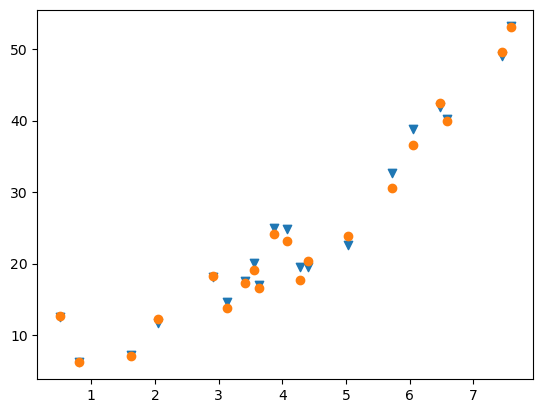

In [57]:
# Predict Graph
plt.scatter(data_predict['time_study'], knnr_result, marker = 'v', label = 'Predict Value')
plt.scatter(data_predict['time_study'], data_predict_ans, label = 'Answer Value')
plt.show()

In [65]:
# Evaluate Model Mean Squared Error
# MSE = Sigma ( y - y^ ) ^2 / n
mse_score = skmt.mean_squared_error(data_predict_ans, knnr_result)
print ('MSE Score :', mse_score)

MSE Score : 1.084407673999999


In [67]:
# Evaluate Model Root Mean Squared Error
# RMSE = root ( MSE )
rmse_score = np.sqrt(mse_score)
print ('RMSE Score :', rmse_score)

RMSE Score : 1.041348968405884


In [69]:
# Evaluate Model R2 Score (Coenfficient of Determination)
# R^2 = 1 - root ( Sigma ( y - y^ ) ^2 / Sigma ( y - y~ ) ^2 )
r2_score = skmt.r2_score(data_predict_ans, knnr_result)
print ('R2 Score :', r2_score)

R2 Score : 0.9937819644602224


In [71]:
# Model Score == R2 Score
model_score = knnr_model.score(data_predict, data_predict_ans)
print ('Model Score :', model_score)

Model Score : 0.9937819644602224


In [76]:
# Compare Linear Regression
lr_model = skl.LinearRegression()
lr_model = lr_model.fit(data_train, data_train_ans)
lr_model

LinearRegression()

In [78]:
# Evaluate Linear Regression Model
lr_result = lr_model.predict(data_predict)
lr_mse_score = skmt.mean_squared_error(data_predict_ans, lr_result)
lr_rmse_score = np.sqrt(lr_mse_score)
lr_r2_score = skmt.r2_score(data_predict_ans, lr_result)
lr_model_score = lr_model.score(data_predict, data_predict_ans)
print ('LR Model MSE Score :', lr_mse_score)
print ('LR Model RMSE Score :', lr_rmse_score)
print ('LR Model R2 Score :', lr_r2_score)
print ('LR Model Score :', lr_model_score)

LR Model MSE Score : 10.823984498942083
LR Model RMSE Score : 3.289982446600906
LR Model R2 Score : 0.9379348542894723
LR Model Score : 0.9379348542894723
